# Circular orbits

In this example notebook, we want to study circular orbits for ``time-like`` particles around a black hole in PyGRO, to show the capabilities of the code to reproduce known theoretical results.

Let's start by importing the necessary modules:

In [1]:
import pygro
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['text.usetex'] = False
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = "#cdcdcd"
mpl.rcParams['grid.linestyle'] = ":"
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#767afe", "#2b926c", "#b53546", "#e78b50", "#703676", "#b68ec4", "#37b4b4", "#c8c330"]) 
mpl.rcParams['font.family'] = 'cmr10'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.formatter.use_mathtext'] = True
mpl.rcParams['axes.unicode_minus']=False

defining the usual Schwarzschild metric:

In [3]:
name = "Schwarzschild spacetime"
coordinates = ["t", "r", "theta", "phi"]

transform_functions = [
    "t",
    "r*sin(theta)*cos(phi)",
    "r*sin(theta)*sin(phi)",
    "r*cos(theta)"
]

line_element = "-(1-2*M/r)*dt**2+1/(1-2*M/r)*dr**2+r**2*(dtheta**2+sin(theta)**2*dphi**2)"

metric = pygro.Metric(
    name = name,
    coordinates = coordinates,
    line_element = line_element,
    transform = transform_functions,
    M = 1,
)


(PyGRO) INFO: Initializing Schwarzschild spacetime.
(PyGRO) INFO: Calculating inverse metric.
(PyGRO) INFO: Calculating symbolic equations of motion.
(PyGRO) INFO: Computing helper functions to normalize 4-velocity.
(PyGRO) INFO: The Metric (Schwarzschild spacetime) has been initialized.


and defining the ``GeodesicEngine`` with a stopping criterion at the event horizon:

In [4]:
geo_engine = pygro.GeodesicEngine(metric)
geo_engine.set_stopping_criterion("r > 2.00001*M", "horizon")

(PyGRO) INFO: Linking Schwarzschild spacetime to the Geodesic Engine
(PyGRO) INFO: Metric linking complete.


## Stable circular orbit

The first thing we want to study is the existence of stable orbital configurations for zero-eccentricity orbits with a radius $r> 6M$.

We will make use of the ``Orbit`` object to define a time-like geodesic starting from the values of its Keplerian-like orbital parameters.
In particular, let's fix the mandatory parameters that uniquely deterimine the in-orbital-plane motion of the star $(t_P,\,a,\,e)$, to $t_P = 0$ (without loss of generality), $a = 20M$ and $e =0$ (to obtain a circular orbit). We will not assign values to the angular orbital parameters which will be automatically be fixed to $0^\circ$.

Moreover, we integrate the orbit for a proper time interval of $1000M$, starting at its pericenter (``at = "peri"``) with some given precision and accuracy goals. We also fix the maximum step size of the integration at $1M$. This guarantees that we have at least 1000 points on the integrated orbit and thus enough resolution to plot it. 

In [5]:
orbit = pygro.Orbit(geo_engine)
orbit.set_orbital_parameters(0, 20, 0)
orbit.integrate(1000, 1, accuracy_goal = 12, precision_goal = 12, hmax = 1)

(PyGRO) WARNING: Longitude of ascending node not specified, set to 0.
(PyGRO) WARNING: Argument of the pericenter not specified, set to 0.
(PyGRO) WARNING: Inclination not specified, set to 0.


Let's also define some functions to plot the results. 

More specifically, we want to see the resulting orbit on the equatorial plane, anlong with the effective potential as a function of the radius, to see in action how the assignement of the inital conditions work.

In [6]:
def plot_orbit(orbit, color):
    plt.close('all')

    fig, ax = plt.subplots()

    t, x, y, z = metric.transform(orbit.geo.x.T)

    ax.plot(x, y, color = color)

    theta = np.linspace(0, 2*np.pi, 150)
    x_bh = 2*np.cos(theta)
    y_bh = 2*np.sin(theta)

    ax.fill(x_bh, y_bh, color = "k")

    ax.set_axisbelow(True)

    lim = 50

    ax.axis('equal')

    ax.set_xlim(-20, 50)
    ax.set_ylim(-20, 20)

    ax.set_xlabel(r'$x$ ($M$)')
    ax.set_ylabel(r'$y$ ($M$)')

    ax.axis('equal')

def plot_effective_potential(orbit, color, limits = [2.3, 100]): 
    fig, ax = plt.subplots()

    r = np.linspace(*limits, 1000)

    ax.plot(r, -orbit.V_eff(orbit.E, orbit.L, r), color = color)

    ax.axvline(orbit.a, linestyle = ":", color = "firebrick")
    ax.axhline(0, linestyle = "--", linewidth = 1, color = "k")

    ax.set_xlabel(r'$r$ ($M$)')
    ax.set_ylabel(r'$V_{\rm eff}(r)$')

Let's use the first function to show the orbit and the black hole on the equatorial plane.

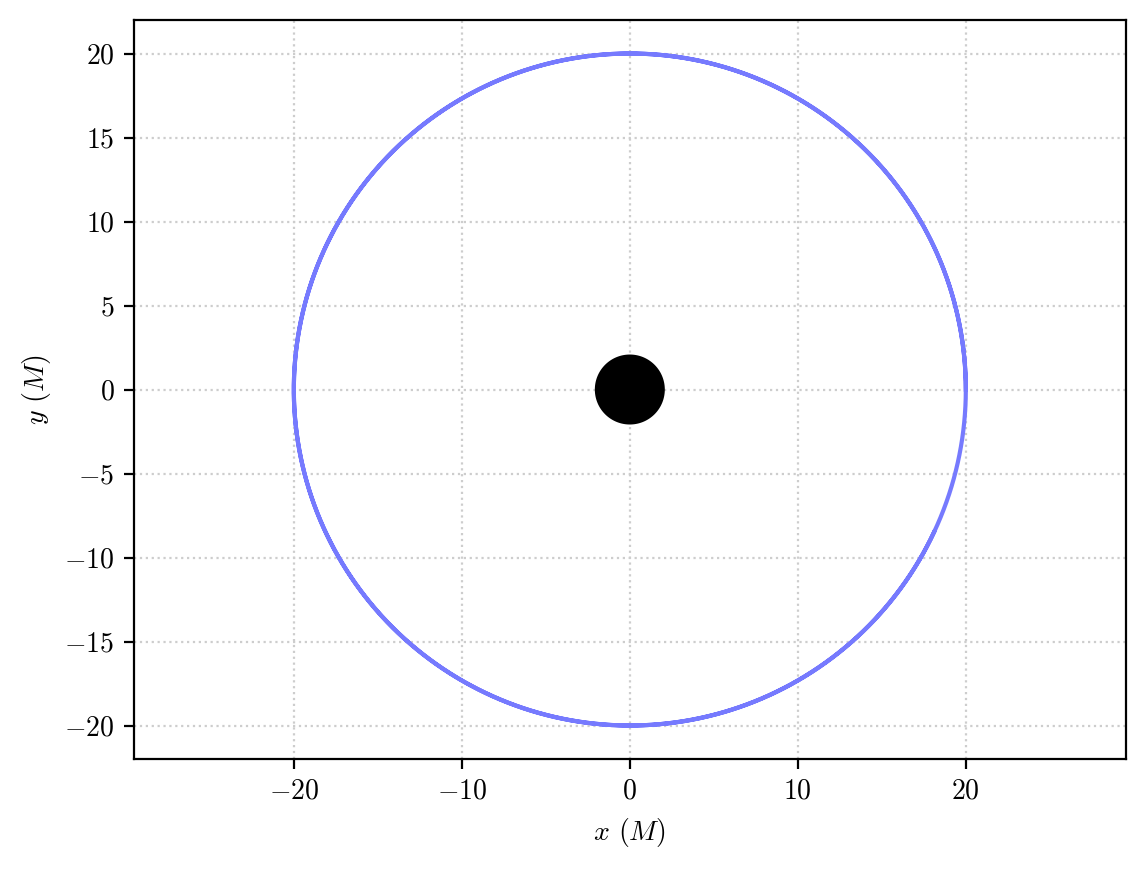

In [7]:
plot_orbit(orbit, color = "#767afe")

Fine! As expected, we obtain a circular obtit with constant $r= 20M$. The orbit is stable, so we can carry on the integration for a much longer period of proper time and it will reamin on this orbit for as long as we want.

We can see this by plotting the effective potential and the initial radius (as a vertical line):



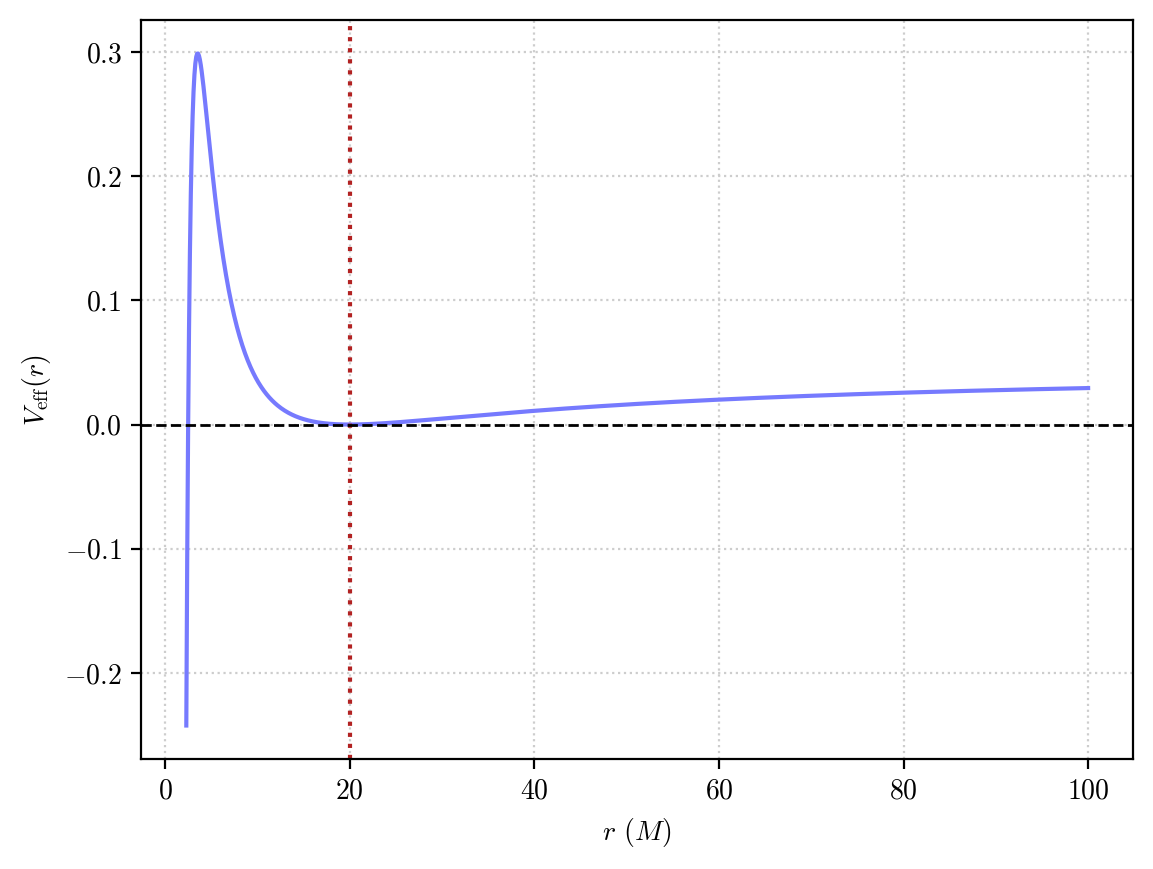

In [8]:
plot_effective_potential(orbit, color = "#767afe")

Great, as anticipated, the orbit is stable, sitting right at a minimum of the effective potential. This works beacuse, when setting ``e=0`` in the definition of the ``Orbit`` object, PyGRO automatically looks for orbital configurations that correspond to a minimum of the orbital potential at the position given by the semi-major axis.

## Innermost Stable Circular Orbit (ISCO)

As we know from standard relativistic celestial mechanics, we can repeat what we have done so far up to a minimum radius of $r=6M$ which is denoted as the *Innermost Stable Circular Orbit* (ISCO).

The name is quite self-explanatory. Defining an orbit at the ISCO:

In [9]:
orbit = pygro.Orbit(geo_engine)
orbit.set_orbital_parameters(0, 6, 0)
orbit.integrate(1000, 1, accuracy_goal = 12, precision_goal = 12, hmax = 1)

(PyGRO) WARNING: Longitude of ascending node not specified, set to 0.
(PyGRO) WARNING: Argument of the pericenter not specified, set to 0.
(PyGRO) WARNING: Inclination not specified, set to 0.


still gives out a circular orbit:

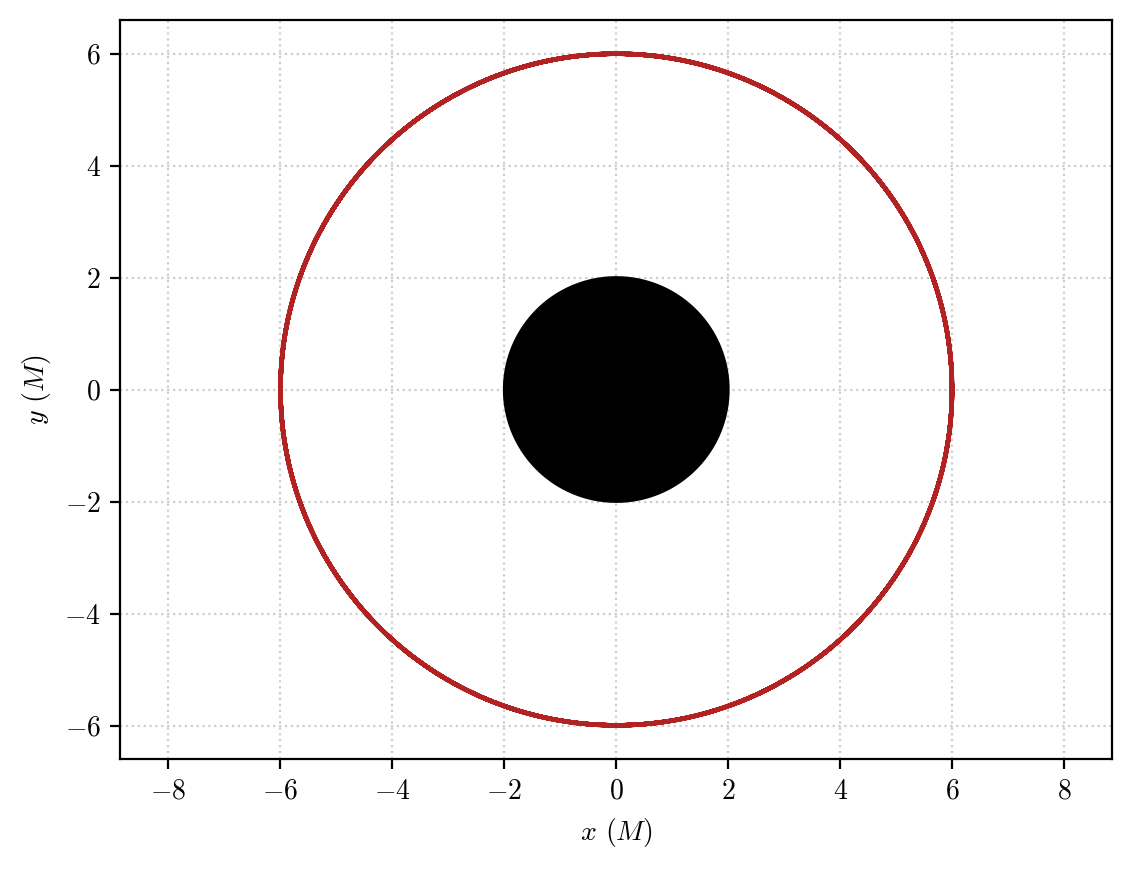

In [10]:
plot_orbit(orbit, color = "firebrick")

but this time the effective potential, that we can plot using our previously defined function, does not have a minimum point at the orbital radius. Rather, it has a saddle point:

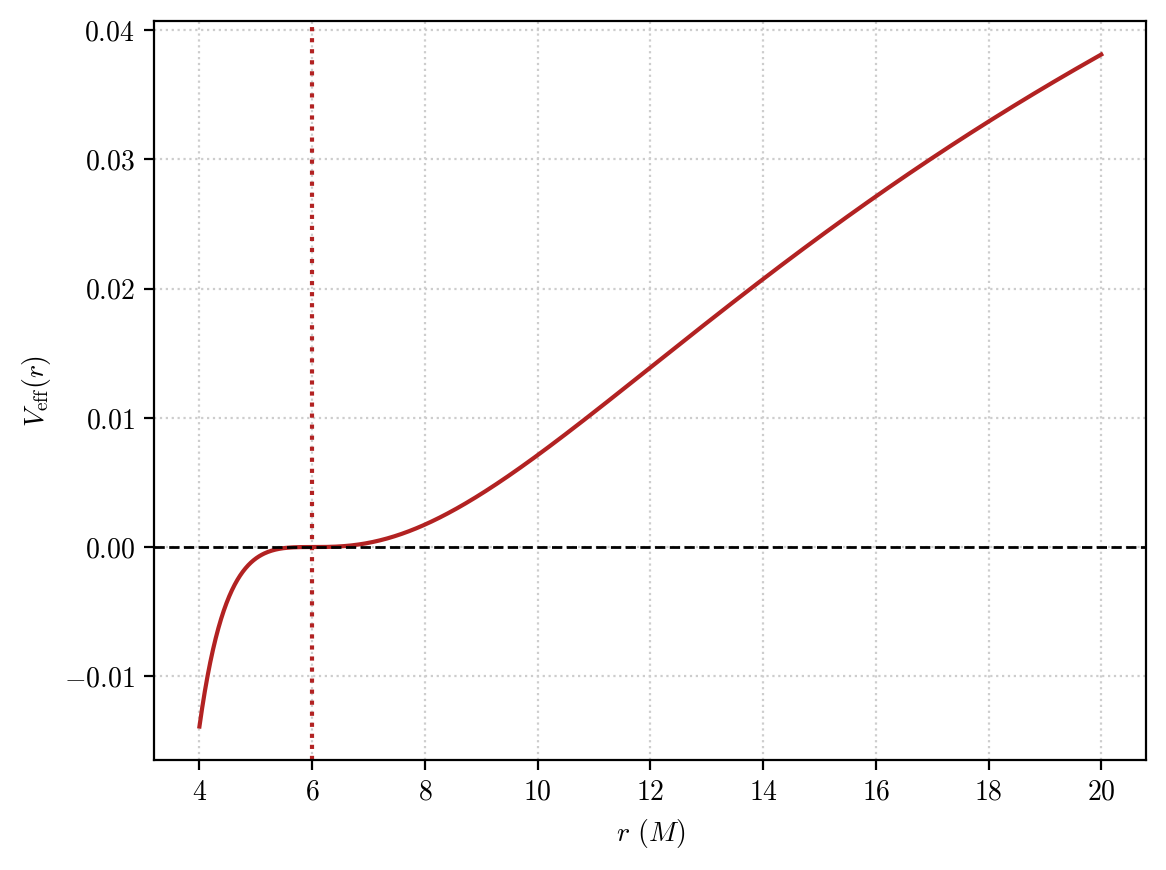

In [11]:
plot_effective_potential(orbit, color = "firebrick", limits = [4, 20])

Again, PyGRO will autonomously be able to fix initial conditions at the ISCO, because it looks for points that extremize the effective potential.

## Marginally bound circular orbits

The fact that the ISCO has $r=6M$ does not imply necessarily that circular orbits cannot exist for $r<6M$.

In fact, we can defin a zero-eccentricity orbit at $r=5M$ and see what happens:

In [12]:
orbit = pygro.Orbit(geo_engine)
orbit.set_orbital_parameters(0, 5, 0)
orbit.integrate(100, 1, accuracy_goal = 12, precision_goal = 12, hmax = 1)

(PyGRO) WARNING: Longitude of ascending node not specified, set to 0.
(PyGRO) WARNING: Argument of the pericenter not specified, set to 0.
(PyGRO) WARNING: Inclination not specified, set to 0.


The integration is carried out without problems, and we obtain:

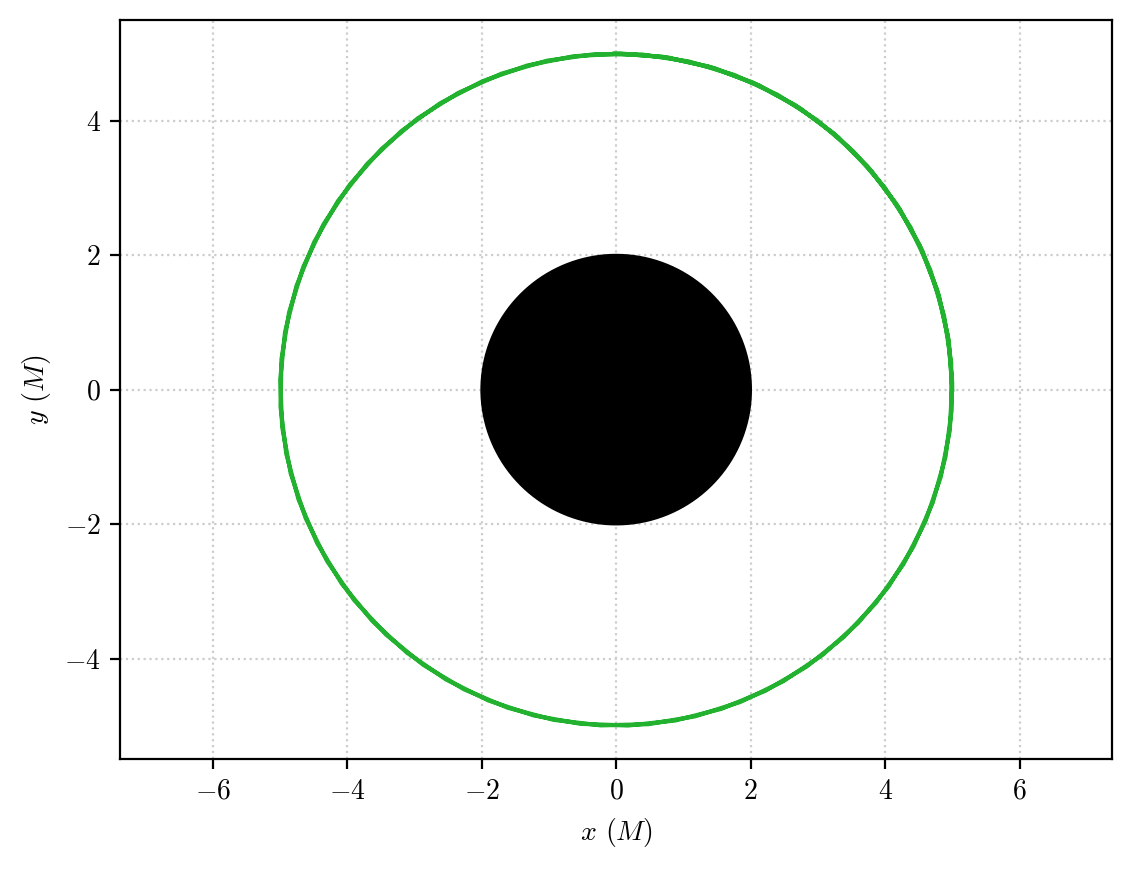

In [13]:
plot_orbit(orbit, color = "#22b230")

a circular orbit!

However, if we now plot the effective potential, we get:

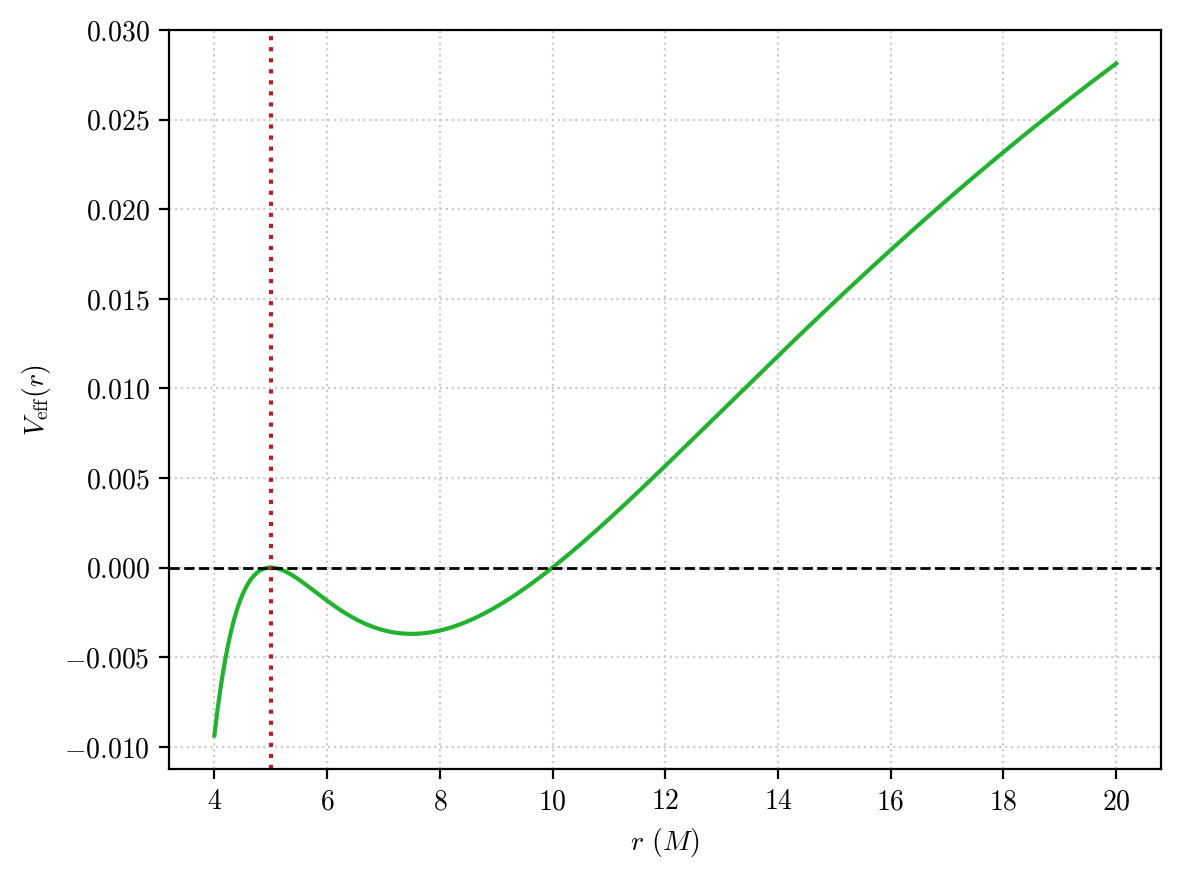

In [14]:
plot_effective_potential(orbit, color = "#22b230", limits=[4, 20])

The orbit sits on an unstable maximum of the potential. This means that the orbit is *bound* to the black hole and if we carry out the integration for a much longer interval of time it will eventually escape the equilibirum point, branching out of the circular configuration either on an elliptic orbit (given by the other root og the $V_eff(r) = 0$ equation) or falling into the black hole.

For example, let's consider the orbit

In [15]:
orbit = pygro.Orbit(geo_engine)
orbit.set_orbital_parameters(0, 5, 0)
orbit.integrate(10000, 1, accuracy_goal = 12, precision_goal = 12, hmax = .1)

(PyGRO) WARNING: Longitude of ascending node not specified, set to 0.
(PyGRO) WARNING: Argument of the pericenter not specified, set to 0.
(PyGRO) WARNING: Inclination not specified, set to 0.


and plot the resulting geodesic

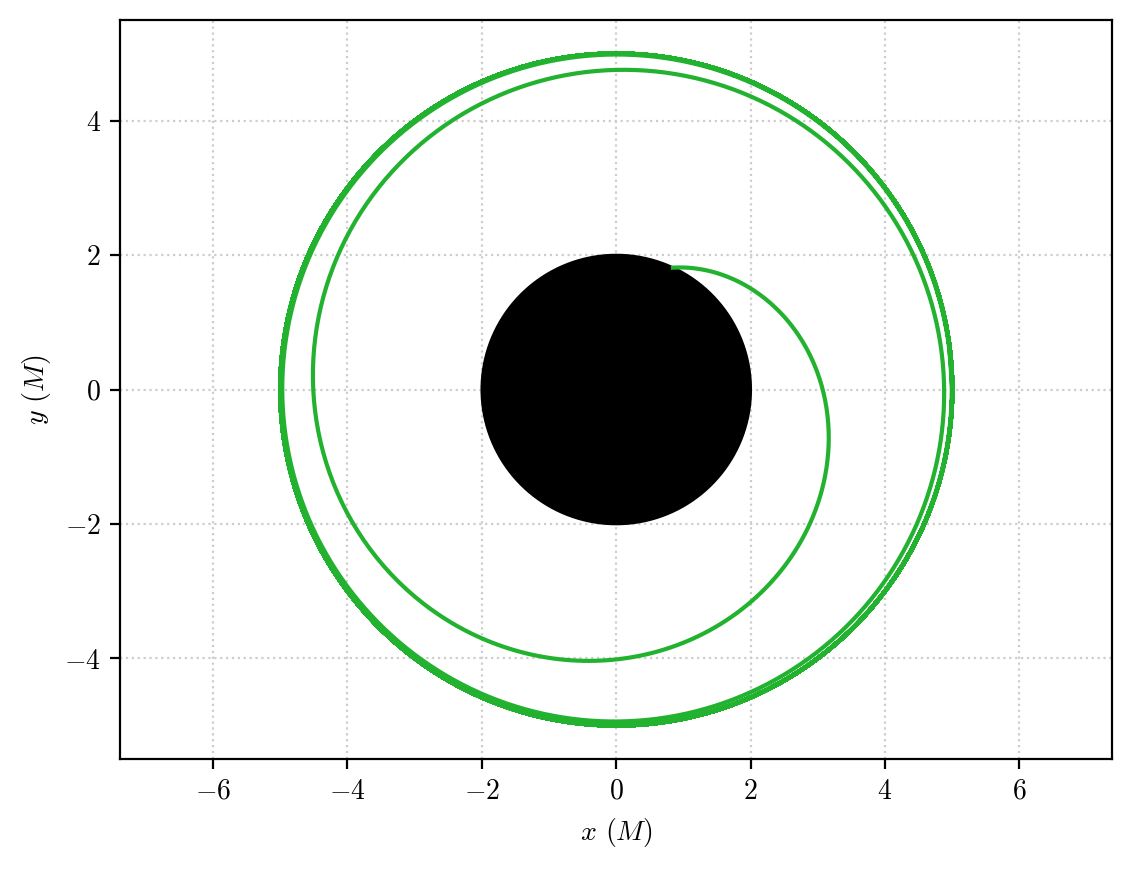

In [16]:
plot_orbit(orbit, "#22b230")

it eventually plunges in the black hole, due to small numerical errors that over time accumulate and bring the system out of the equilibrium.

Of course, we can reduce the maximum step size of the integration and adjust the accuracy and precision tolerances of the integrator to make the orbit stay circular for as long as we need.

## Plunging orbit

Bound circular orbits are still possible between the ISCO and $r = 4M$, the so-called marginally bound orbit. 

For $3M < r < 4M$ we can still obtain circular orbits, which are extremely unstable and are unbound, meaning that once they escape local maximum of the potnetial they can either fall into the black hole or escape infinity.

Finally, if we consider orbits with $r<3M$ they are forced to fall in the central black hole, as no stable orbital configuration exists for this case:

In [17]:
orbit = pygro.Orbit(geo_engine)
orbit.set_orbital_parameters(0, 3, 0)
orbit.integrate(10000, 1, accuracy_goal = 12, precision_goal = 12, hmax = 1)

(PyGRO) WARNING: Longitude of ascending node not specified, set to 0.
(PyGRO) WARNING: Argument of the pericenter not specified, set to 0.
(PyGRO) WARNING: Inclination not specified, set to 0.


which results in:

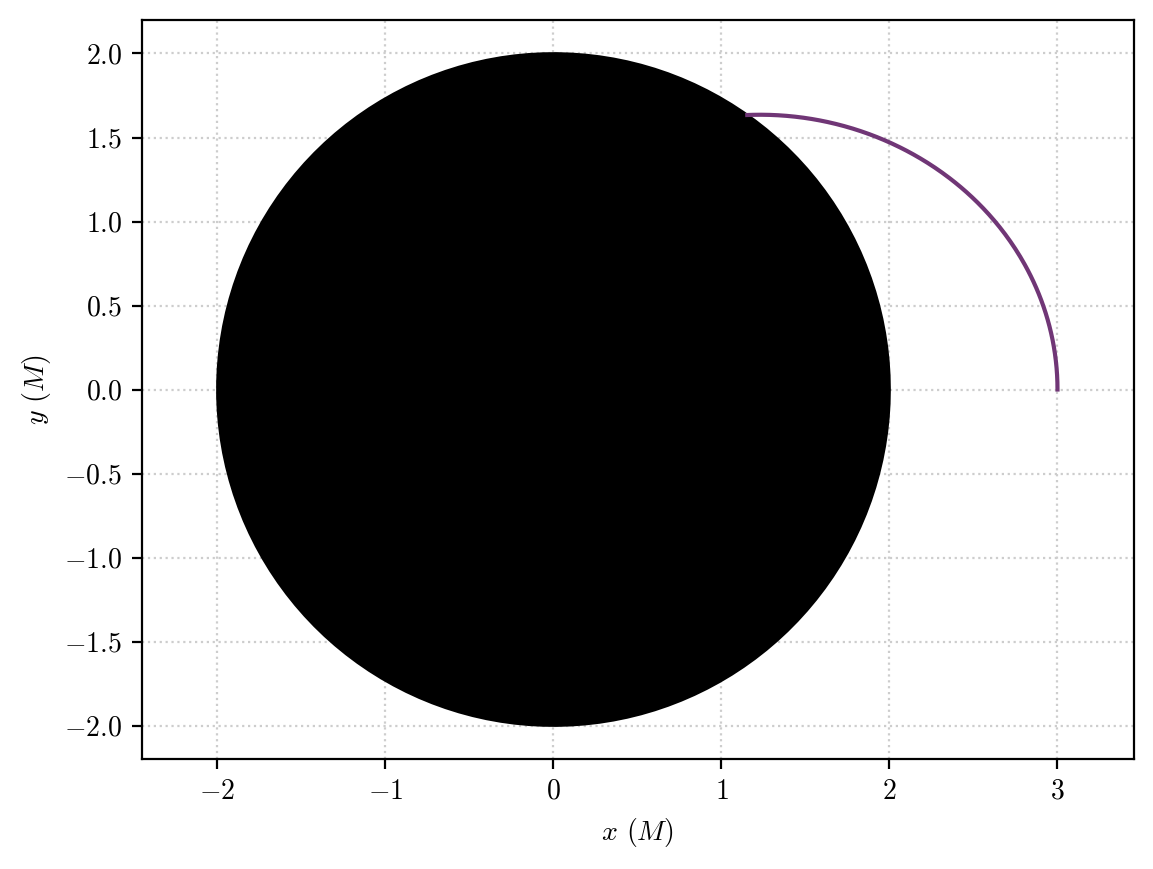

In [18]:
plot_orbit(orbit, "#703676")

whose effective potential has no equilibrium

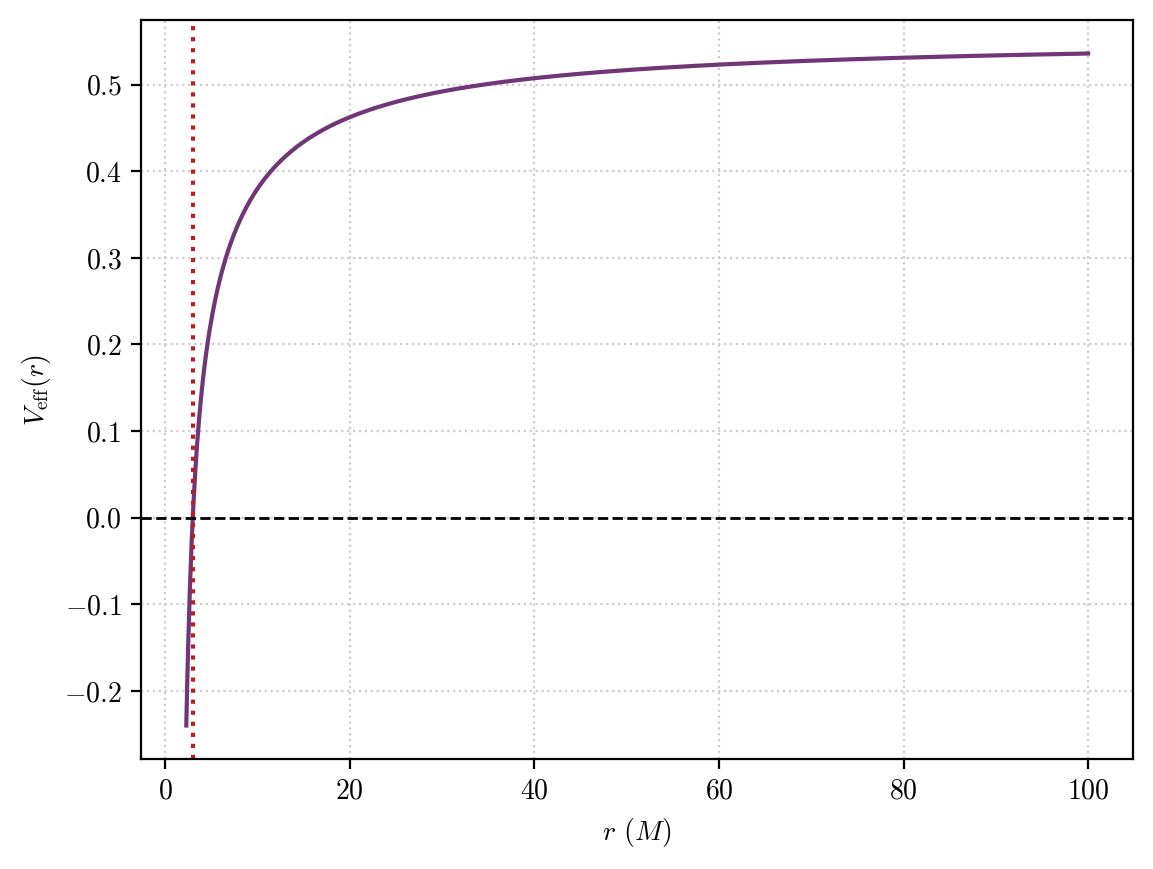

In [19]:
plot_effective_potential(orbit, "#703676")